In [19]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, simplify, lambdify, Float, Eq, solve
from tabulate import tabulate

In [ ]:
def ajuste_minimos_quadrados(x_vals, y_vals, grau=1):
    x = symbols('x')
    n = len(x_vals)

    A = []
    for i in range(grau + 1):
        linha = [sum(xi**(i + j) for xi in x_vals) for j in range(grau + 1)]
        A.append(linha)

    B = [sum(y_vals[k] * x_vals[k]**i for k in range(n)) for i in range(grau + 1)]

    a = sp.symbols(f'a0:{grau+1}')
    sistema = [Eq(sum(A[i][j]*a[j] for j in range(grau + 1)), B[i]) for i in range(grau + 1)]
    solucao = solve(sistema, a)

    coeficientes = [Float(solucao[a[i]].evalf(), 4) for i in range(grau + 1)]
    polinomio = sum(coeficientes[i] * x**i for i in range(grau + 1))

    f_ajuste = lambdify(x, polinomio, 'numpy')
    tabela = [(round(xi, 4), round(f_ajuste(xi), 4)) for xi in x_vals]

    return polinomio, tabela, f_ajuste

In [ ]:
def correlacao_pearson(x_vals, y_vals):
    n = len(x_vals)
    soma_x = sum(x_vals)
    soma_y = sum(y_vals)
    soma_xy = sum(x * y for x, y in zip(x_vals, y_vals))
    soma_x2 = sum(x ** 2 for x in x_vals)
    soma_y2 = sum(y ** 2 for y in y_vals)

    numerador = n * soma_xy - soma_x * soma_y
    denominador = np.sqrt((n * soma_x2 - soma_x ** 2) * (n * soma_y2 - soma_y ** 2))

    if denominador == 0:
        return 0
    return numerador / denominador

In [ ]:
def calcular_rmse(y_real, y_aprox):
    return np.sqrt(np.mean((np.array(y_real) - np.array(y_aprox)) ** 2))

Ajuste de Curvas - Mínimos Quadrados

Procurando melhor grau de ajuste...

Tabela de análise por grau:
+--------+---------+--------------+------------------------------------------------------------------+
|   Grau |    RMSE |   Correlação | Polinômio                                                        |
+========+=========+==============+==================================================================+
|      1 | 13.4368 |       0.6941 | 196.92 - 0.86537*x                                               |
+--------+---------+--------------+------------------------------------------------------------------+
|      2 | 13.4368 |       0.6941 | 1.2015e-5*x^2 - 0.86759*x + 197.02                               |
+--------+---------+--------------+------------------------------------------------------------------+
|      3 | 11.0057 |       0.8077 | -0.0032922*x^3 + 0.91429*x^2 - 84.2*x + 2686.8                   |
+--------+---------+--------------+--------------------------------------

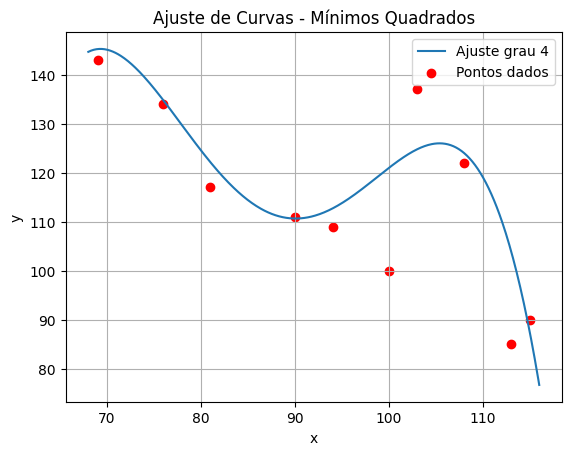

In [21]:
# Leitura dos dados
print("Ajuste de Curvas - Mínimos Quadrados")
n = int(input("Digite o número de pontos: "))
x_vals = [69, 76, 81, 90, 94, 100, 103, 108, 113, 115]
y_vals = [143, 134, 117, 111, 109, 100, 137, 122, 85, 90]
# for i in range(n):
#     x = float(input(f"x{i}: "))
#     y = float(input(f"y{i}: "))
#     x_vals.append(x)
#     y_vals.append(y)

modo = input("\nDeseja informar o grau do polinômio ou escolher automaticamente? (manual/auto): ").strip().lower()

if modo == 'manual':
    grau = int(input("Digite o grau do polinômio de ajuste: "))
else:
    print("\nProcurando melhor grau de ajuste...")
    menor_rmse = float('inf')
    melhor_grau = 1
    analise_ajustes = []

    for grau_teste in range(1, min(n, 5)):
        polinomio, _, f_teste = ajuste_minimos_quadrados(x_vals, y_vals, grau_teste)
        y_aprox = f_teste(np.array(x_vals))
        erro = calcular_rmse(y_vals, y_aprox)
        correlacao = correlacao_pearson(y_vals, y_aprox)
        polinomio_str = str(polinomio.evalf(n=5)).replace("**", "^")

        analise_ajustes.append((grau_teste, round(erro, 4), round(correlacao, 4), polinomio_str))

        if erro < menor_rmse:
            menor_rmse = erro
            melhor_grau = grau_teste

    print("\nTabela de análise por grau:")
    print(tabulate(analise_ajustes, headers=["Grau", "RMSE", "Correlação", "Polinômio"], tablefmt="grid"))
    grau = melhor_grau
    print(f"\nGrau escolhido automaticamente: {grau}")

# Ajuste final
polinomio, tabela, f_ajuste = ajuste_minimos_quadrados(x_vals, y_vals, grau)

# Exibe o polinômio ajustado
print("\nPolinômio ajustado (grau {}):".format(grau))
print(sp.pretty(polinomio, use_unicode=True))

# Exibe a tabela de pontos
print("\nTabela de pontos:")
print(tabulate(tabela, headers=["x", "y ajustado"], tablefmt="grid"))

# Estimativa de valor y para um x dado
x_estimado = float(input("\nDigite um valor de x para estimar y: "))
y_estimado = f_ajuste(x_estimado)
print(f"y({x_estimado}) ≈ {y_estimado:.4f}")

# Coeficiente de correlação de Pearson
pearson_r = correlacao_pearson(x_vals, y_vals)
print(f"\nCoeficiente de correlação de Pearson (final): r = {pearson_r:.4f}")

# Gráfico
x_plot = np.linspace(min(x_vals) - 1, max(x_vals) + 1, 500)
y_plot = f_ajuste(x_plot)

plt.plot(x_plot, y_plot, label=f'Ajuste grau {grau}')
plt.scatter(x_vals, y_vals, color='red', label='Pontos dados')
plt.title('Ajuste de Curvas - Mínimos Quadrados')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()